   Age  Gender hiking_frequency like_to_hike_alone like_to_hike_in_group  \
0   38    Male     Once a month  Somewhat disagree        Strongly agree   
1   33  Female      Once a year  Strongly disagree        Somewhat agree   
2   43  Female     Once a month  Strongly disagree        Strongly agree   
3   28  Female      Once a week  Strongly disagree        Somewhat agree   
4   34    Male      Once a year  Strongly disagree        Strongly agree   

  like_to_hike_near_home hike_while_traveling hike_for_health  \
0         Strongly agree       Somewhat agree  Somewhat agree   
1         Strongly agree       Somewhat agree  Somewhat agree   
2         Somewhat agree       Somewhat agree  Somewhat agree   
3         Somewhat agree       Strongly agree  Somewhat agree   
4         Somewhat agree       Somewhat agree  Somewhat agree   

  hike_for_social_interaction    hike_for_fun  ... smartphone  \
0              Somewhat agree  Strongly agree  ...        Yes   
1           Strongly d

<ipython-input-2-8f81144d8291>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)


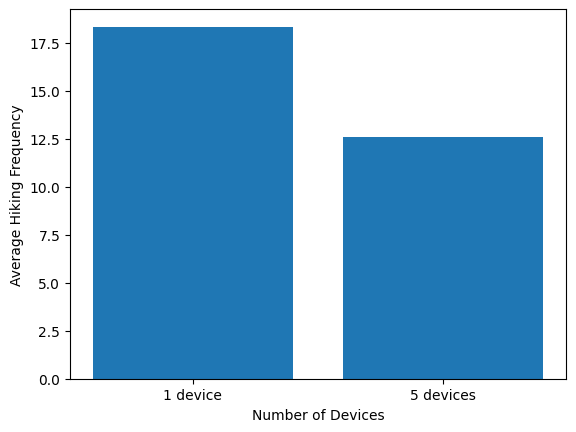

done


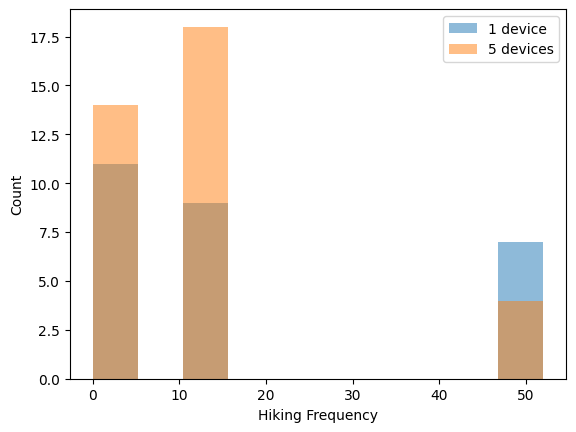

done
                    hiking_frequency_numeric
number _of_devices                          
0                                  12.000000
1                                  18.351852
2                                  15.097403
3                                  16.753425
4                                  13.868852
5                                  12.597222
6                                   9.961538
7                                  26.100000
8                                  14.500000
9                                   6.500000


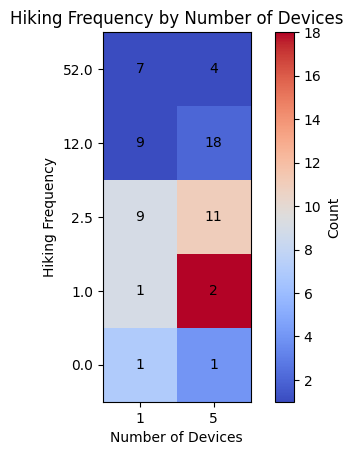

p-value: 0.5363644661842046
Residuals:
number _of_devices               1         5
hiking_frequency_numeric                    
0.0                       0.166667 -0.125000
1.0                      -0.222222  0.166667
2.5                       0.050000 -0.037500
12.0                     -0.222222  0.166667
52.0                      0.484848 -0.363636

device counts
number _of_devices
2    77
3    73
4    61
5    36
1    27
6    13
7     5
8     4
9     2
0     1
Name: count, dtype: int64 

0    smartphone
1    smartphone
2    smartphone
3    smartphone
4    smartphone
5    smartphone
6    smartphone
7    smartphone
8    smartphone
9    smartphone
Name: smartphone, dtype: object
0                       smartphone, headphones/earbuds
1                       smartphone, headphones/earbuds
2                       smartphone, headphones/earbuds
3    smartphone, headphones/earbuds,portable charge...
4    smartphone, headphones/earbuds,smart watch,por...
5    smartphone, headphones/earbuds,a

In [ ]:
import pandas as pd

# Step 2: Load data into a DataFrame
df = pd.read_excel('Hiking_data.xlsx')
print(df.head())  
#print(df.info())


print ("these are the gender counts---")
# Count the number of respondants in the dataset by 
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Define a mapping from categories to numerical values
mapping = {
    'Once a month': 12,  # 12 times a year
    '2-3 times per year': 2.5,  # Average of 2 and 3
    'Once a week': 52, # once a week
    'Once a year': 1, # once a year
    'Never': 0, # never
}

print ("doing the replacement...")
# Replace the categories with their numerical values
df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)
print (df['hiking_frequency_numeric'].head(5))
print ("Done")

# Calculate the mean
avg_hiking_frequency = df['hiking_frequency_numeric'].mean()
print ("mean of all respondants: ")
print(avg_hiking_frequency)


print('comparison between 1 and 5 devices')


# make a new dataframe that just contains the rows in df that have 1 in the number_of_devices column
df_1_devices = df[df['number _of_devices'] == 1]
print (df_1_devices.head(10))
# and get a new dataframe with just the rows with 5 in number_of_devices
df_5_devices = df[df['number _of_devices'] == 5]
print (df_5_devices.head(10))

# Calculate the mean of the hiking duration for both groups
avg_hiking_frequency_1_devices = df_1_devices['hiking_frequency_numeric'].mean()
avg_hiking_frequency_5_devices = df_5_devices['hiking_frequency_numeric'].mean()
print ("mean of 1 devices: ")
print(avg_hiking_frequency_1_devices)
print ("mean of 5 devices: ")
print(avg_hiking_frequency_5_devices)

import matplotlib.pyplot as plt

# barchart of 1 device and 5 devices
plt.bar(['1 device', '5 devices'], [avg_hiking_frequency_1_devices, avg_hiking_frequency_5_devices])
plt.xlabel('Number of Devices')
plt.ylabel('Average Hiking Frequency')
plt.show()
print('done')

# Graph histogram of 1 devices and 5 devices
plt.hist(df_1_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='1 device')
plt.hist(df_5_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='5 devices')
plt.xlabel('Hiking Frequency')
plt.ylabel('Count')
plt.legend()
plt.show()
print('done')

# Step 3: Create a pivot table
pivot_table = pd.pivot_table(df, values='hiking_frequency_numeric', index='number _of_devices', aggfunc='mean')
print(pivot_table)
                   

# Create a pivot table with devices as columns and frequencies as rows
pivot_table = df[df['number _of_devices'].isin([1, 5])].pivot_table(index='hiking_frequency_numeric', columns='number _of_devices', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.imshow(pivot_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(pivot_table.columns)-0.5, -0.5, len(pivot_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Hiking Frequency')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Display the cell values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='black')

plt.title('Hiking Frequency by Number of Devices')
plt.show()

import scipy.stats as stats

# Perform chi-square test
chi2, p, _, expected = stats.chi2_contingency(pivot_table)

# Print p-value
print("p-value:", p)

# Calculate residuals
residuals = (pivot_table - expected) / expected

# Display the residuals in a table
print("Residuals:")
print(residuals)


# Count the number of devices in the number_of_devices column
print('\ndevice counts')
device_counts = df['number _of_devices'].value_counts()
print(device_counts, '\n')

# change the name of yes in the smartphone column to smartphone and no to an empty string
df['smartphone'] = df['smartphone'].replace({'Yes': 'smartphone', 'No': ''})
print(df['smartphone'].head(10))


# combine the two dataframes of smartphone and name_of_devices columns
df['smartphone'] = df['smartphone'].str.lower()
df['name_of_devices'] = df['name_of_devices'].str.lower()
df['combined'] = df['smartphone'] + ', ' + df['name_of_devices']
print(df['combined'].head(10))






# make a new dataframe that just contains the rows in df that have 4 in the number_of_devices column
df_4_devices = df[df['number _of_devices'] == 4]
print(df_4_devices.head(20))


#save the dataframe to a new excel file
df.to_excel('Hiking_data_new.xlsx', index=False)

print('done')